{'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2}
train_loader - len 5144
train_loader - type <class 'torchvision.datasets.folder.ImageFolder'>
test_loader - len 1288
test_loader - type <class 'torchvision.datasets.folder.ImageFolder'>
6432
cuda:0
Using CUDA
--------------------------------
FOLD 0
--------------------------------
Sample images for training purpose:
tensor([2, 0, 2, 2, 2, 0, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2,
        2, 1, 0, 2, 2, 2, 1, 1])


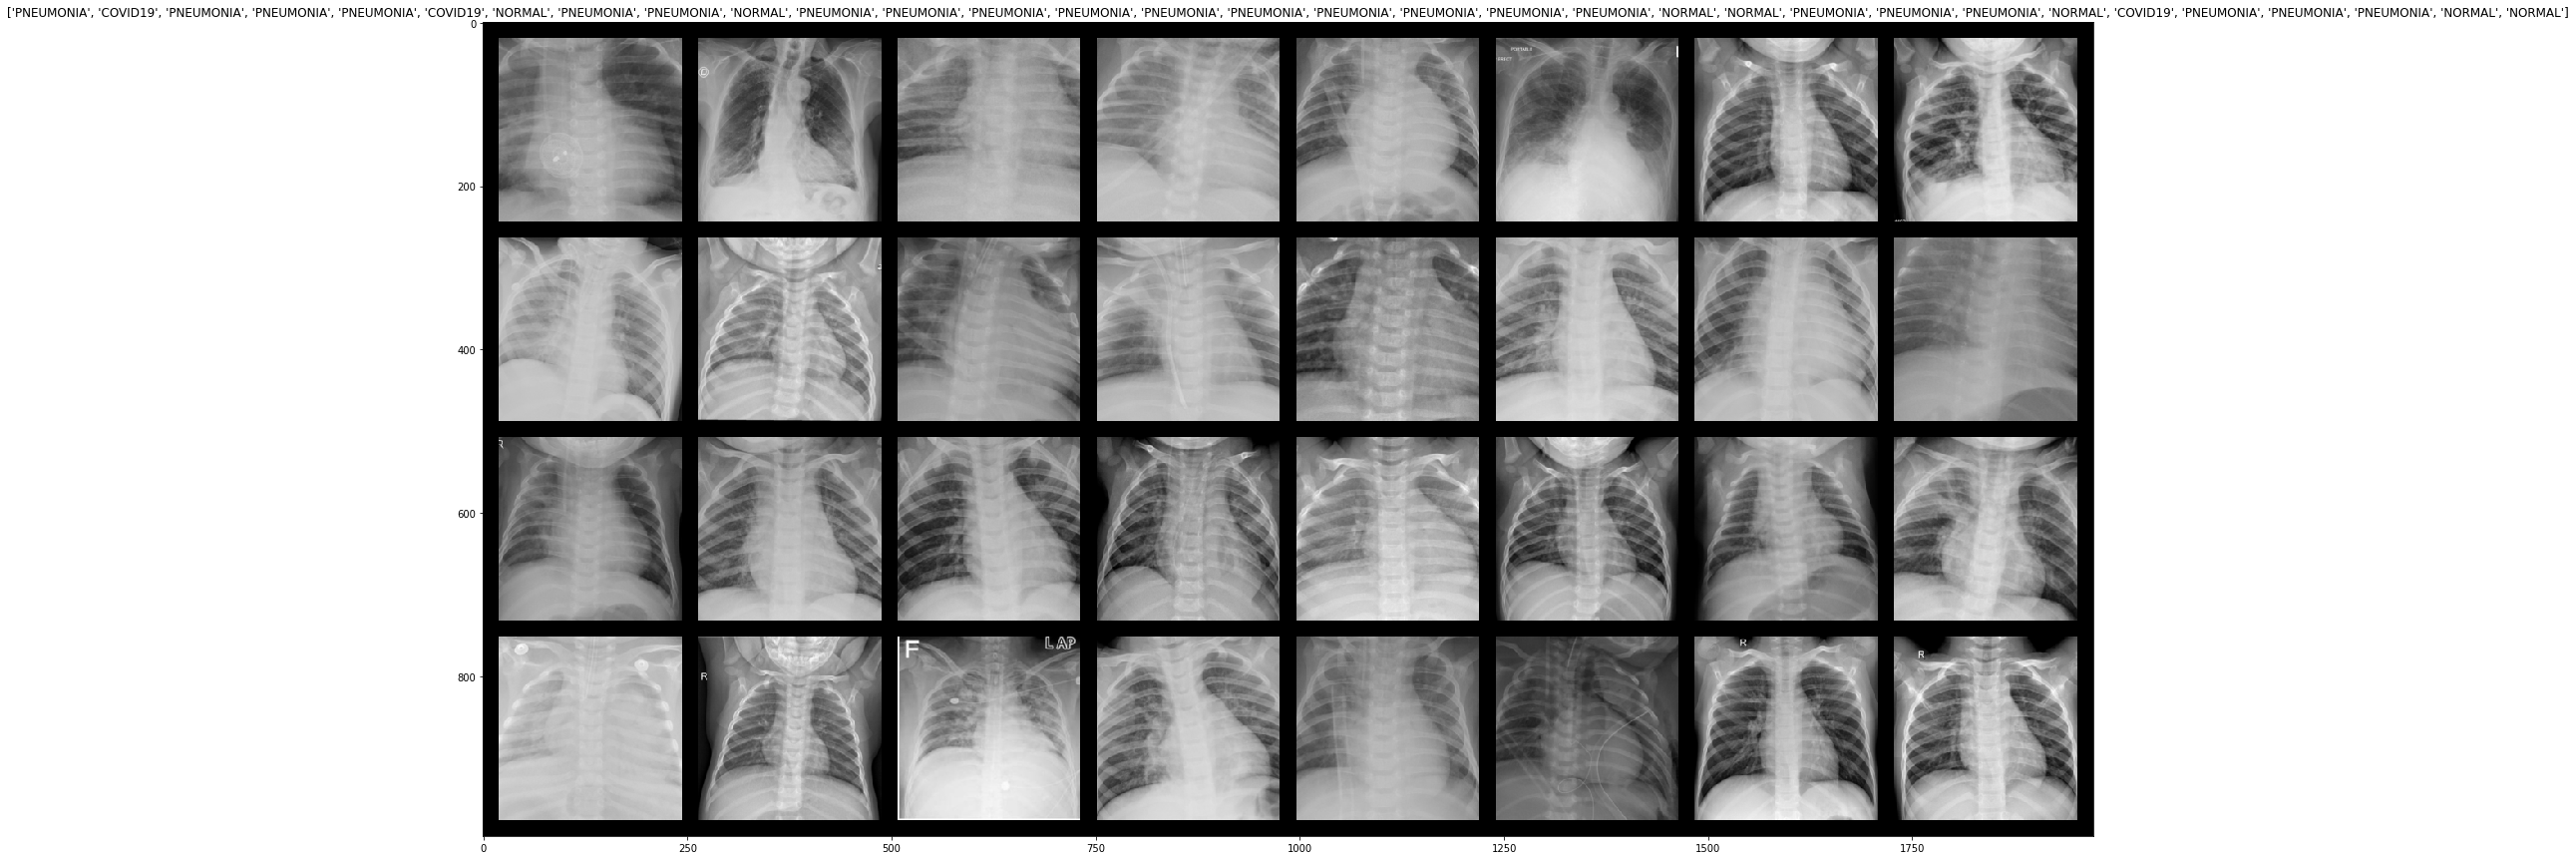

Starting epoch 1
Total train time = 62.27 seconds
Epoch 0: curr_epoch_loss=0.40934792160987854
Training process has finished. Saving trained model.
Starting testing
AUC for fold 0: 0.8561710398445093 % using ResNet50 model: 
Precision for fold 0: 0.936574728177798 % using ResNet50 model: 
Recall for fold 0: 0.7181780963857242 % using ResNet50 model: 
F1-score for fold 0: 0.7880181460957615 % using ResNet50 model: 
--------------------------------
FOLD 1
--------------------------------
Sample images for training purpose:
tensor([2, 0, 1, 1, 0, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 0, 0, 1, 2, 2,
        2, 2, 1, 2, 2, 1, 2, 2])


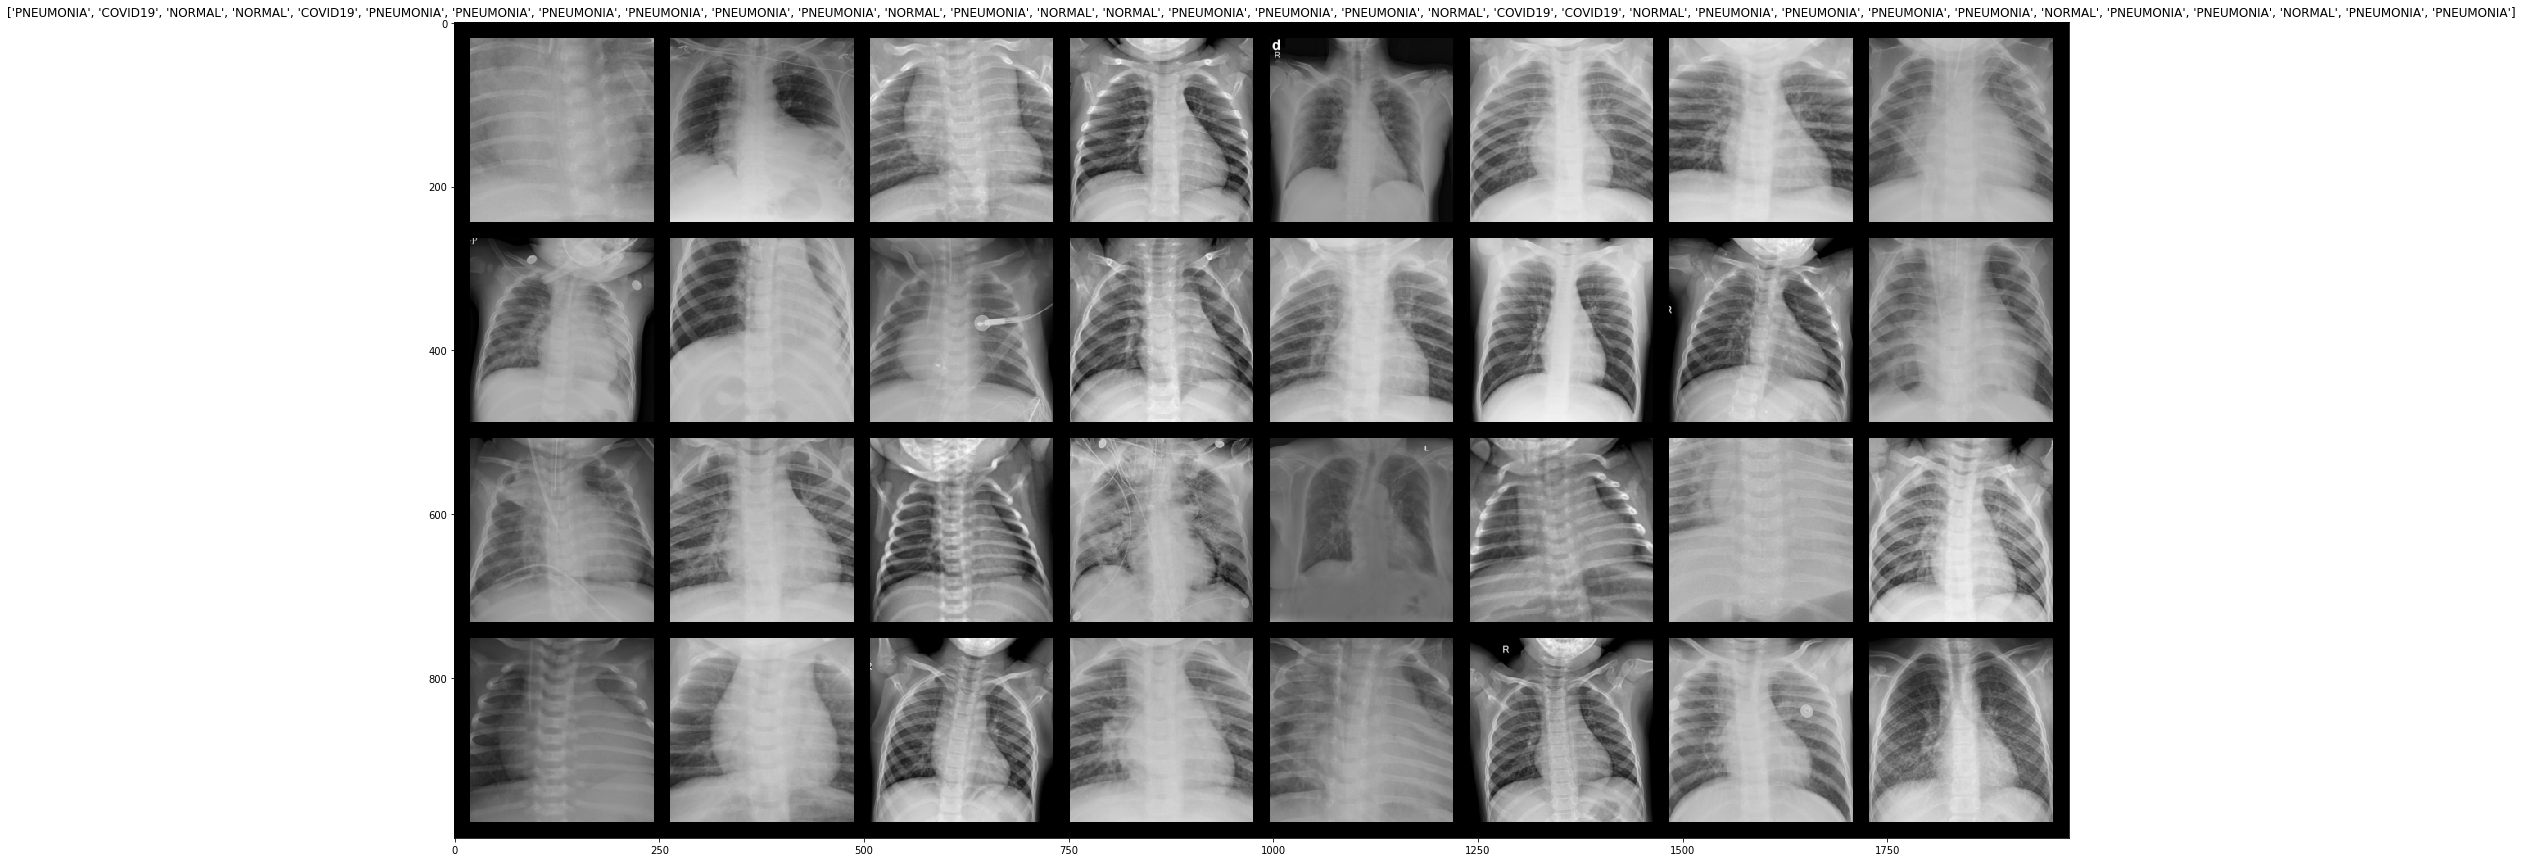

Starting epoch 1
Total train time = 62.13 seconds
Epoch 0: curr_epoch_loss=0.2512013614177704
Training process has finished. Saving trained model.
Starting testing
AUC for fold 1: 0.8345966958211856 % using ResNet50 model: 
Precision for fold 1: 0.8213320457766803 % using ResNet50 model: 
Recall for fold 1: 0.9063454037503855 % using ResNet50 model: 
F1-score for fold 1: 0.8435154994879032 % using ResNet50 model: 
--------------------------------
FOLD 2
--------------------------------
Sample images for training purpose:
tensor([1, 2, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 1, 2, 0, 2, 2, 0, 2, 2, 2,
        0, 2, 1, 1, 1, 2, 1, 2])


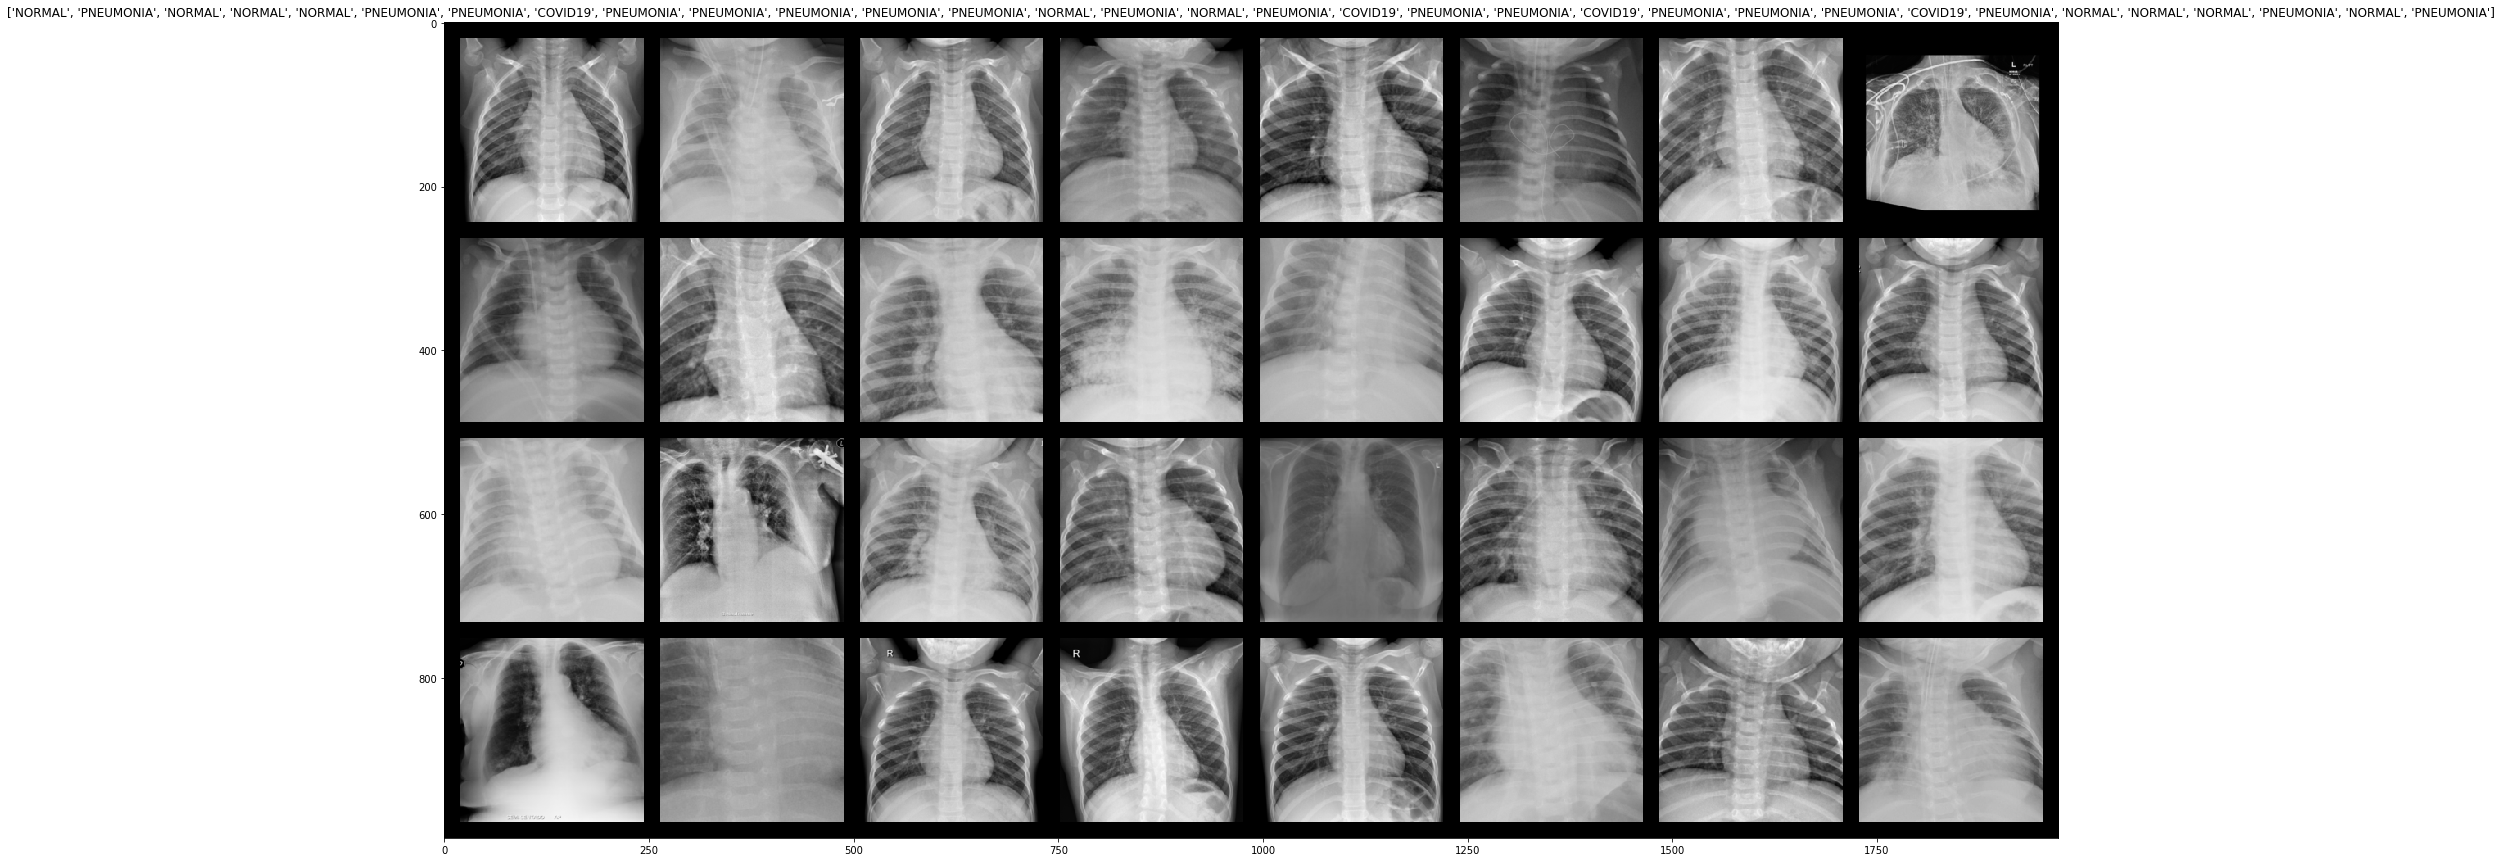

Starting epoch 1
Total train time = 62.10 seconds
Epoch 0: curr_epoch_loss=0.2672346234321594
Training process has finished. Saving trained model.
Starting testing
AUC for fold 2: 0.9527788573649436 % using ResNet50 model: 
Precision for fold 2: 0.9523233676033968 % using ResNet50 model: 
Recall for fold 2: 0.942467901646813 % using ResNet50 model: 
F1-score for fold 2: 0.947299400825964 % using ResNet50 model: 
--------------------------------
FOLD 3
--------------------------------
Sample images for training purpose:
tensor([2, 1, 2, 2, 0, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1,
        1, 1, 2, 2, 2, 1, 2, 1])


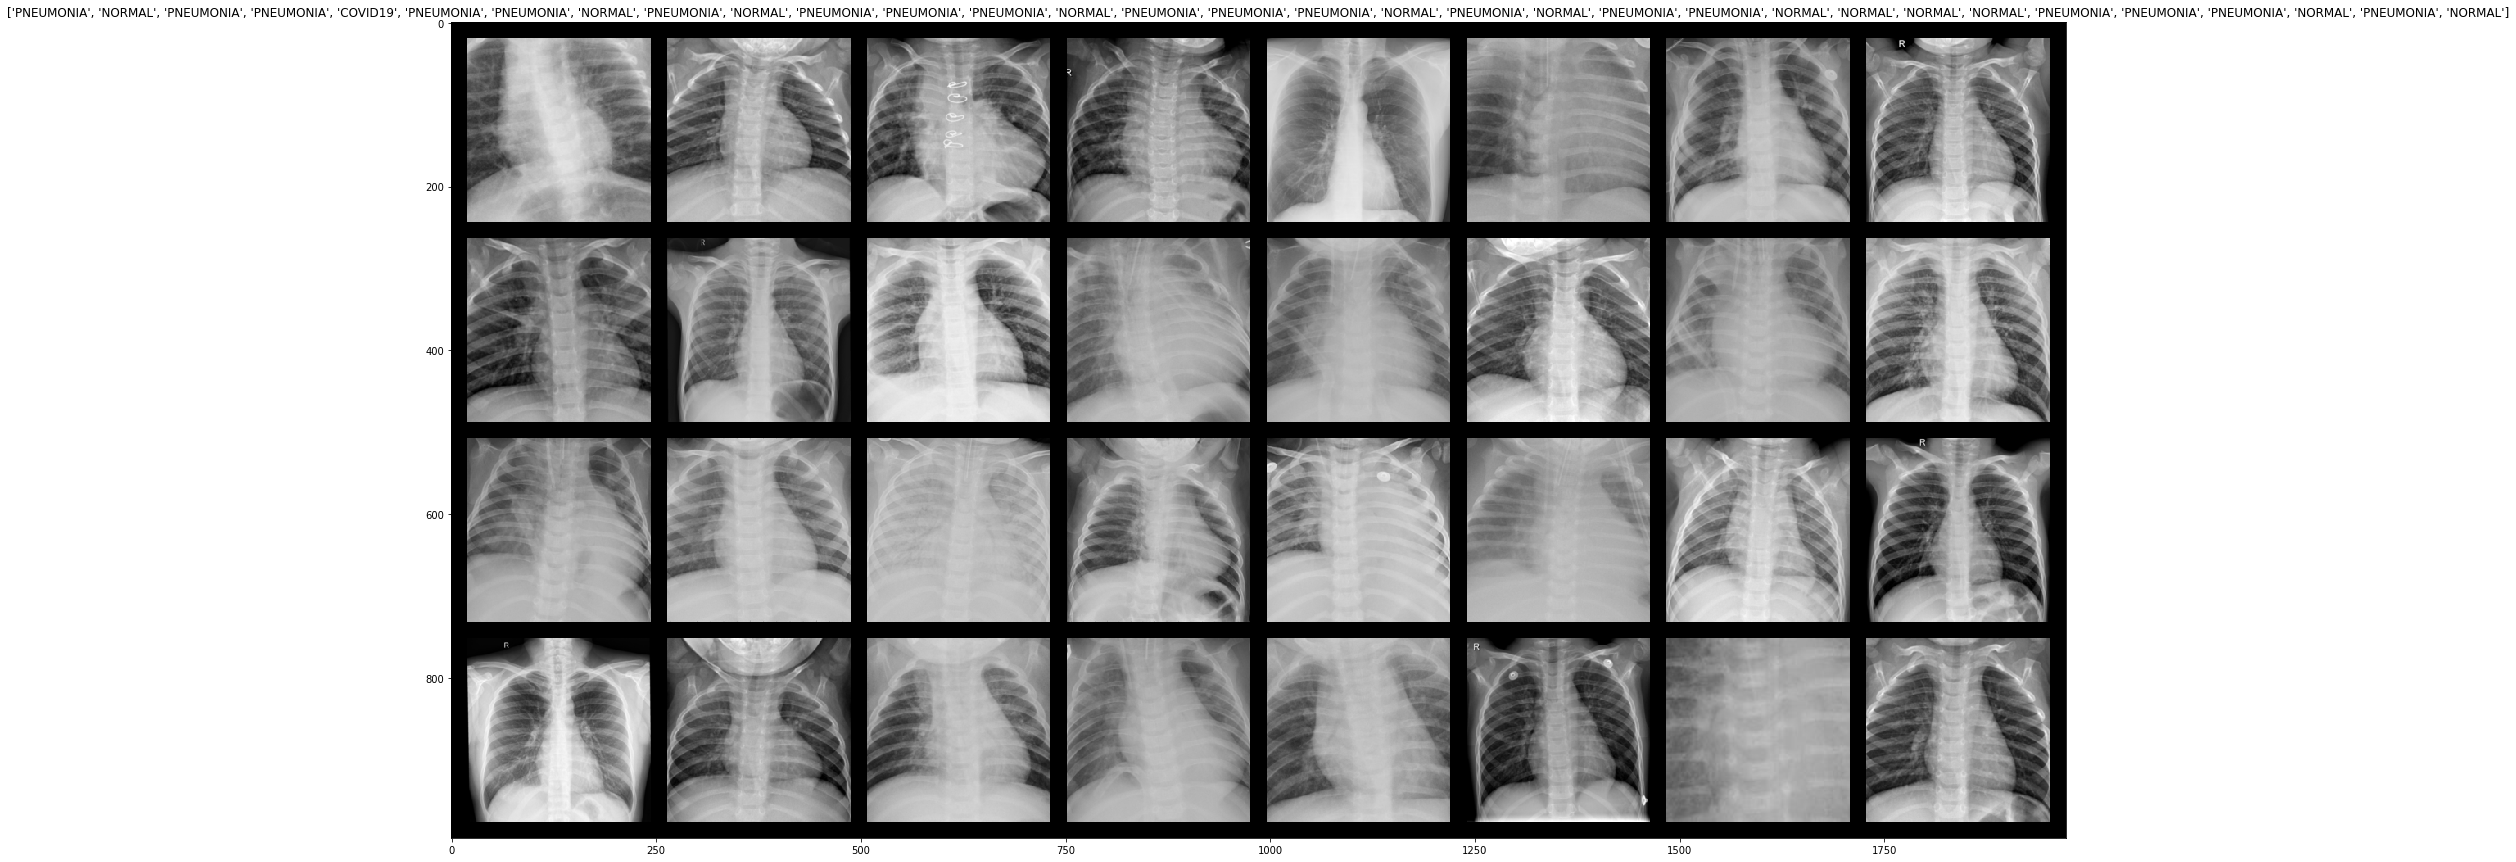

Starting epoch 1
Total train time = 62.19 seconds
Epoch 0: curr_epoch_loss=0.20340394973754883
Training process has finished. Saving trained model.
Starting testing
AUC for fold 3: 0.9475320637388263 % using ResNet50 model: 
Precision for fold 3: 0.9542254514744876 % using ResNet50 model: 
Recall for fold 3: 0.9326713966933146 % using ResNet50 model: 
F1-score for fold 3: 0.9429009382562127 % using ResNet50 model: 
--------------------------------
FOLD 4
--------------------------------
Sample images for training purpose:
tensor([2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 0, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2,
        2, 1, 2, 2, 2, 1, 2, 2])


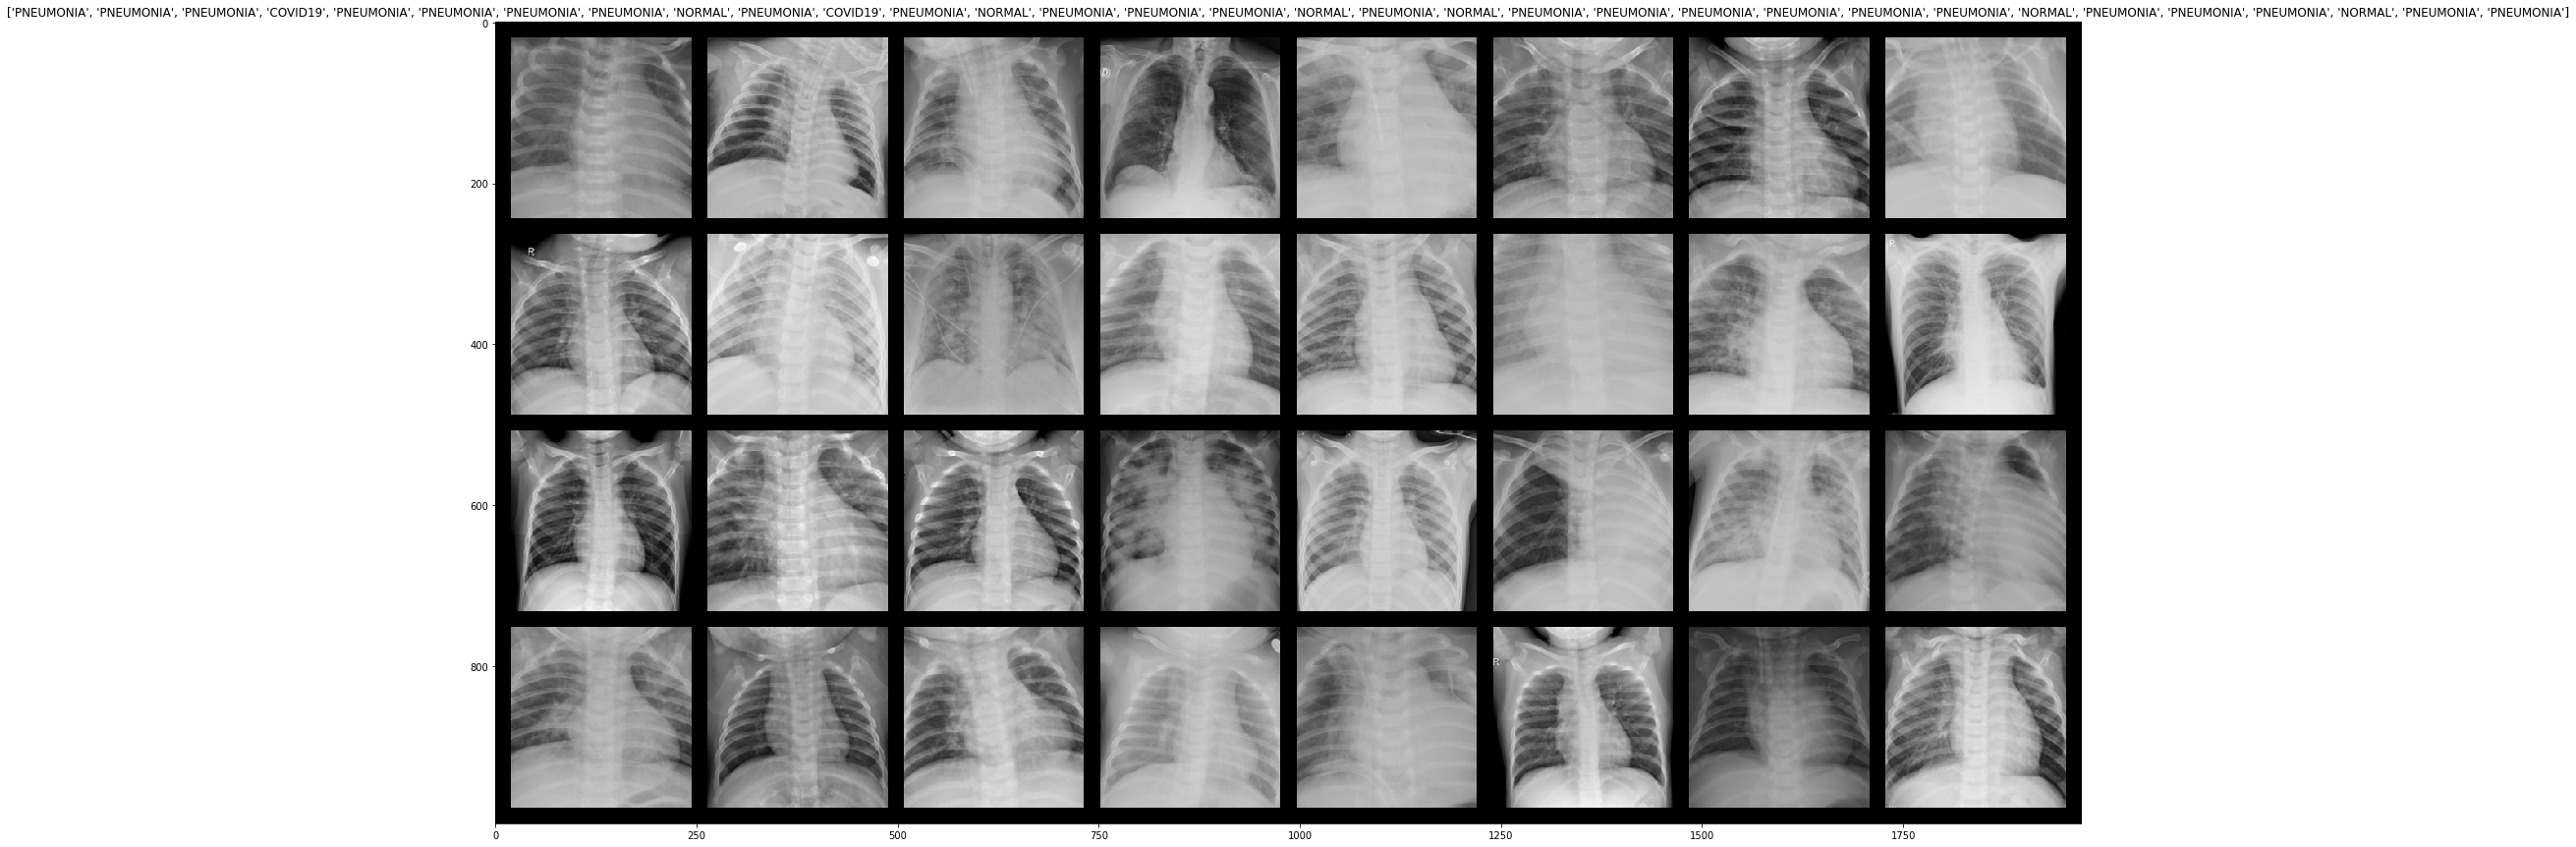

Starting epoch 1
Total train time = 61.88 seconds
Epoch 0: curr_epoch_loss=0.22507472336292267
Training process has finished. Saving trained model.
Starting testing
AUC for fold 4: 0.9461717839098329 % using ResNet50 model: 
Precision for fold 4: 0.9506435418743435 % using ResNet50 model: 
Recall for fold 4: 0.9319642549977075 % using ResNet50 model: 
F1-score for fold 4: 0.9406535532944215 % using ResNet50 model: 
--------------------------------
K-FOLD CROSS VALIDATION RESULTS FOR 5 FOLDS
--------------------------------
AUC results:
Fold 0: 0.86 %
Fold 1: 0.83 %
Fold 2: 0.95 %
Fold 3: 0.95 %
Fold 4: 0.95 %
Maximum AUC: 0.95 %
Precision results:
Fold 0: 0.94 %
Fold 1: 0.82 %
Fold 2: 0.95 %
Fold 3: 0.95 %
Fold 4: 0.95 %
Maximum precision: 0.95 %
Recall results:
Fold 0: 0.72 %
Fold 1: 0.91 %
Fold 2: 0.94 %
Fold 3: 0.93 %
Fold 4: 0.93 %
Maximum recall: 0.94 %
F1-score results:
Fold 0: 0.79 %
Fold 1: 0.84 %
Fold 2: 0.95 %
Fold 3: 0.94 %
Fold 4: 0.94 %
Maximum f1-score: 0.95 %


In [1]:
import os
import zipfile
import copy
import random
import numpy as np
import torch
import time
import torch.nn as nn
import torch.nn.functional as F
import torchsummary
from torch.autograd import Variable
from torchsummary import summary
import torchvision
from torchvision import models
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


#####################Load Data###############################
#!cp '/content/drive/MyDrive/chest-xray-data/Data.zip' '/content'
#local_zip = '/content/Data.zip'
#zip_ref = zipfile.ZipFile(local_zip, 'r')
#zip_ref.extractall('/content')
#zip_ref.close()
DATA_PATH = "Data"
##############################################################

#####################Count Metrics#############################
def get_count_metrics(folder, data_path=DATA_PATH):

    train_dir = os.path.join(data_path, folder)
    list_p = os.listdir(os.path.join(train_dir,'PNEUMONIA')) # dir is your directory path
    num_p = len(list_p)
    list_n = os.listdir(os.path.join(train_dir,'NORMAL')) # dir is your directory path
    num_n = len(list_n)
    list_c = os.listdir(os.path.join(train_dir,'COVID19')) # dir is your directory path
    num_c = len(list_c)
    count_tuple = (int(num_n), int(num_p), int(num_c))
    #count_tuple = (int(num_p), int(num_c))
    #raise NotImplementedError

    #return number_normal, number_pneumonia
    return count_tuple

###############################################################

###########################Data Load############################

def load_data(data_path=DATA_PATH):

    import torchvision
    import torchvision.datasets as datasets
    import torchvision.transforms as transforms

    # your code here
    transform_dict = {
        'train': transforms.Compose(
        [transforms.Resize(224),
         transforms.CenterCrop(224),
         transforms.ToTensor(),
         ]),
        'test': transforms.Compose(
        [transforms.Resize(224),
         transforms.CenterCrop(224),
         transforms.ToTensor(),
         ])}
    
    train_data = datasets.ImageFolder(root=data_path + '/train', transform=transform_dict['train'])
    print(train_data.class_to_idx)
    #train_loader = torch.utils.data.DataLoader(train_data, batch_size=32, num_workers=4, shuffle=True)
    #print(train_loader.class_to_idx)
    print('train_loader - len', len(train_data))
    print('train_loader - type', type(train_data))
    
    test_data = datasets.ImageFolder(root=data_path + '/test', transform=transform_dict['test'])
    #test_loader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=False)
    print('test_loader - len', len(test_data))
    print('test_loader - type', type(test_data))
    #raise NotImplementedError
    
    return train_data, test_data

train_data, test_data = load_data()

dataset = torch.utils.data.ConcatDataset([train_data, test_data])

print(len(dataset))

###############################################################################

###################reset weights#################################

def reset_weights(m):
  '''
    Try resetting model weights to avoid
    weight leakage.
  '''
  for layer in m.children():
   if hasattr(layer, 'reset_parameters'):
    print(f'Reset trainable parameters of layer = {layer}')
    layer.reset_parameters()

###########################GPU DEVICE######################################

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

use_gpu = torch.cuda.is_available()
if use_gpu:
    print("Using CUDA")

################################Show Images########################

def show_batch_images(dataloader):
    images, labels = next(iter(dataloader))
    grid = torchvision.utils.make_grid(images, padding=20)
    print(labels)
    npgrid = grid.cpu().numpy()
    plt.figure(figsize=(30, 15))
    plt.imshow(np.transpose(npgrid, (1, 2, 0)), interpolation='nearest')
    plt.title(label=["COVID19" if x==0  else ("NORMAL" if x == 1 else "PNEUMONIA") for x in labels])
    plt.show()
#####################################################################


num_classes = 3
resnet50 = torchvision.models.resnet50(pretrained=True)
for param in resnet50.parameters():
    param.requires_grad = False
    # Parameters of newly constructed modules have requires_grad=True by default   
num_ftrs = resnet50.fc.in_features        
resnet50.fc = nn.Linear(num_ftrs, num_classes)

resnet50.cuda()

############################Main Function################################
  
if __name__ == '__main__':
  
  # Configurat,ion options
  k_folds = 5
  num_epochs = 1
  loss_function = nn.CrossEntropyLoss()
  
  # For fold results
  results_AUC = {}
  results_precision = {}
  results_recall = {}
  results_f1 = {}
  
  # Set fixed random number seed
  torch.manual_seed(24)
  
  # Define the K-fold Cross Validator
  kfold = KFold(n_splits=k_folds, shuffle=True)
    
  # Start print
  print('--------------------------------')

  # K-fold Cross Validation model evaluation
  for fold, (train_ids, test_ids) in enumerate(kfold.split(dataset)):
    
    # Print
    print(f'FOLD {fold}')
    print('--------------------------------')
    
    # Sample elements randomly from a given list of ids, no replacement.
    train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
    test_subsampler = torch.utils.data.SubsetRandomSampler(test_ids)
    
    # Define data loaders for training and testing data in this fold
    train_loader = torch.utils.data.DataLoader(dataset, batch_size=32, num_workers=4, sampler=train_subsampler)
    test_loader = torch.utils.data.DataLoader(test_data, batch_size=32, sampler=test_subsampler)
    
    print(f'Sample images for training purpose:')
    for i in range(1):
        show_batch_images(train_loader)

    _START_RUNTIME = time.time()

    resnet50.train() # Prep model for training
    # Initialize optimizer
    optimizer = torch.optim.SGD(resnet50.parameters(), lr=1e-2, momentum=0.9)
    
    # Run the training loop for defined number of epochs
    for epoch in range(0, num_epochs):

      # Print epoch
        print(f'Starting epoch {epoch+1}')

      # Set current loss value
        curr_epoch_loss = []
      # Iterate over the DataLoader for training data
        for inputs, labels in train_loader:
            inputs = inputs.to(device)
            targets = labels.to(device)
            #inputs, targets = Variable(inputs.cuda()), Variable(targets.cuda())
        
        # Zero the gradients
            optimizer.zero_grad()
        
        # Perform forward pass
            outputs = resnet50(inputs)
        
        # Compute loss
            loss = loss_function(outputs, targets)
        
        # Perform backward pass
            loss.backward()
        
        # Perform optimization
            optimizer.step()
        
        # Print statistics
            curr_epoch_loss.append(loss.cpu().data.numpy())
        print("Total train time = {:.2f} seconds".format(time.time() - _START_RUNTIME))    
        print(f"Epoch {epoch}: curr_epoch_loss={np.mean(curr_epoch_loss)}")
            
    # Process is complete.
        print('Training process has finished. Saving trained model.')

    # Print about testing
        print('Starting testing')
    
    # Saving the model
        save_path = f'./model-fold-{fold}.pth'
        torch.save(resnet50.state_dict(), save_path)

    # Evaluationfor this fold
        resnet50.eval()
      # Iterate over the test data and generate predictions
        Y_pred = []
        Y_test = []
        predictions, actuals = list(), list()
        for inputs, targets in train_loader:
            if use_gpu:
              inputs, targets = Variable(inputs.cuda()), Variable(targets.cuda())
        # Generate outputs
          #outputs = resnet50(inputs)

            Y_pred_orig = resnet50(inputs)
            _, Y_pred_tag = torch.max(Y_pred_orig, dim = 1)
            Y_pred_tag = Y_pred_tag.cpu().detach().numpy()
            Y_pred_tag = Y_pred_tag.reshape(len(Y_pred_tag), 1)

            Y_test = targets.cpu().numpy()
            Y_test = Y_test.reshape(len(Y_test), 1)

            predictions.append(Y_pred_tag)
            actuals.append(Y_test)
        Y_pred = np.concatenate(predictions, axis=0)
        Y_test = np.concatenate(actuals, axis=0)

      # Print accuracy

        acc = accuracy_score(Y_test, Y_pred)
        results_AUC[fold] = round(acc, 2)
        precision = precision_score(Y_test, Y_pred, average="macro")
        results_precision[fold] = round(precision, 2)
        recall = recall_score(Y_test, Y_pred, average="macro")
        results_recall[fold] = round(recall, 2) 
        f1 = f1_score(Y_test, Y_pred, average="macro")
        results_f1[fold] = round(f1,2)

        print("AUC for fold %d: %s %% using ResNet50 model: " % (fold, str(acc)))
        print("Precision for fold %d: %s %% using ResNet50 model: " % (fold, str(precision))) 
        print("Recall for fold %d: %s %% using ResNet50 model: " % (fold, str(recall))) 
        print("F1-score for fold %d: %s %% using ResNet50 model: " % (fold, str(f1)))   

        print('--------------------------------')
  
  # Print fold results
print(f'K-FOLD CROSS VALIDATION RESULTS FOR {k_folds} FOLDS')
print('--------------------------------')
print(f'AUC results:')
sum_AUC = 0.0
Max_AUC = 0.0
for key, value in results_AUC.items():
  print(f'Fold {key}: {value} %')
  sum_AUC = value
  if Max_AUC < sum_AUC:
    Max_AUC = sum_AUC
#print(f'Maximum AUC: {sum_AUC/len(results_AUC.items())} %')
print(f'Maximum AUC: {Max_AUC} %')

print(f'Precision results:')
sum_precision = 0.0
Max_precision = 0.0
for key, value in results_precision.items():
  print(f'Fold {key}: {value} %')
  sum_precision = value
  if Max_precision < sum_precision:
    Max_precision = sum_precision
#print(f'Average: {sum_precision/len(results_precision.items())} %')
print(f'Maximum precision: {Max_precision} %')

print(f'Recall results:')
sum_recall = 0.0
Max_recall = 0.0
for key, value in results_recall.items():
  print(f'Fold {key}: {value} %')
  sum_recall = value
  if Max_recall < sum_recall:
    Max_recall = sum_recall
#print(f'Average: {sum_recall/len(results_recall.items())} %')
print(f'Maximum recall: {Max_recall} %')

print(f'F1-score results:')
sum_f1 = 0.0
Max_f1 = 0.0
for key, value in results_f1.items():
  print(f'Fold {key}: {value} %')
  sum_f1 = value
  if Max_f1 < sum_f1:
    Max_f1 = sum_f1
#print(f'Average: {sum_f1/len(results_f1.items())} %')
print(f'Maximum f1-score: {Max_f1} %')
